# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Dependencies

In [1]:
import os
import cv2
import numpy as np
# Load pickled data
import pickle
import random
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# Visualizations will be shown in the notebook.
%matplotlib inline

Using TensorFlow backend.


---
## Step 0: Load The Data

In [2]:
# Load Data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Read csv file
df = pd.read_csv('signnames.csv')


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = y_train.size

# Number of validation examples
n_validation = y_valid.size

# Number of testing examples.
n_test = y_test.size

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


###  visualization of the dataset

Visualize the German Traffic Signs Dataset. 



Speed limit (20km/h)


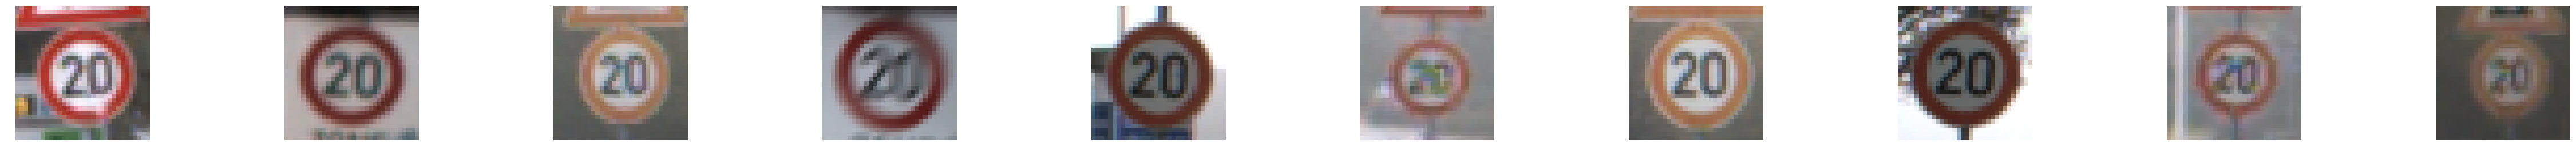

Speed limit (30km/h)


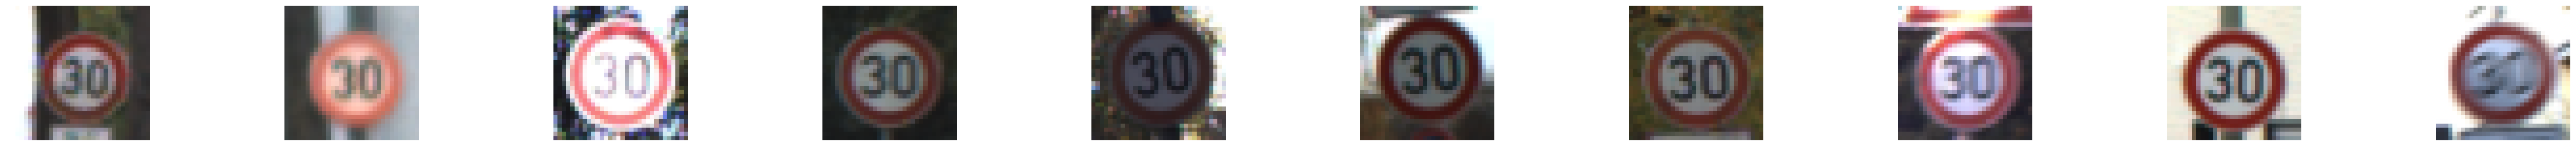

Speed limit (50km/h)


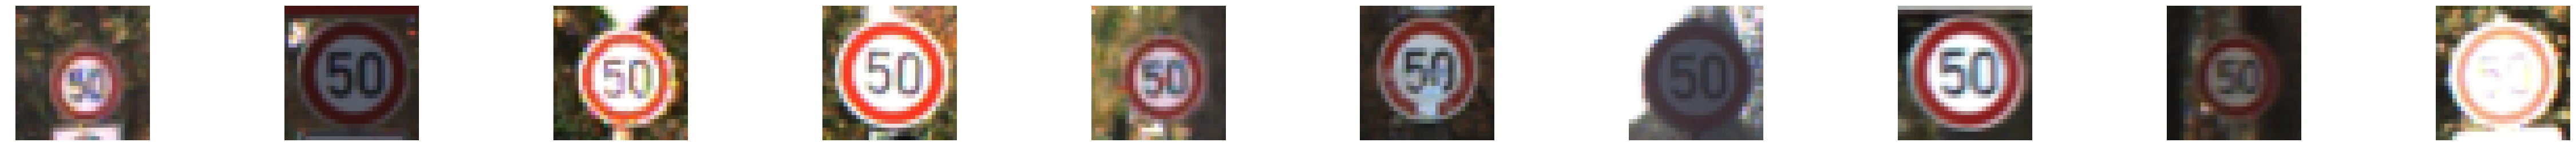

Speed limit (60km/h)


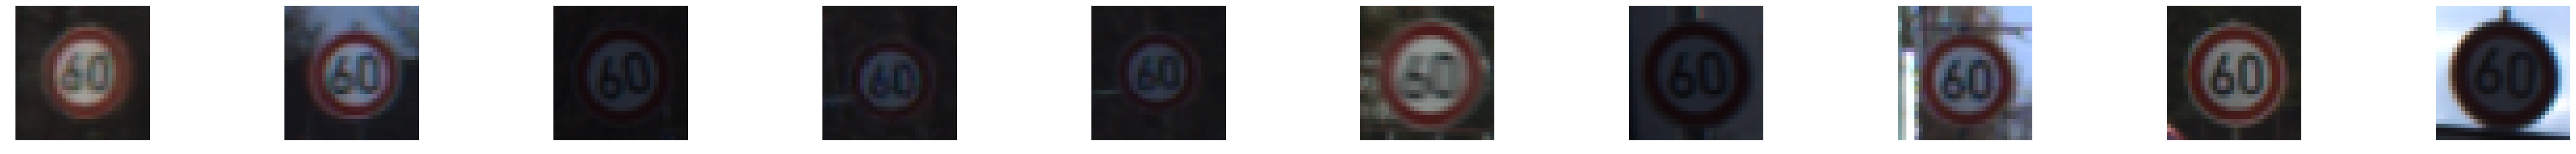

Speed limit (70km/h)


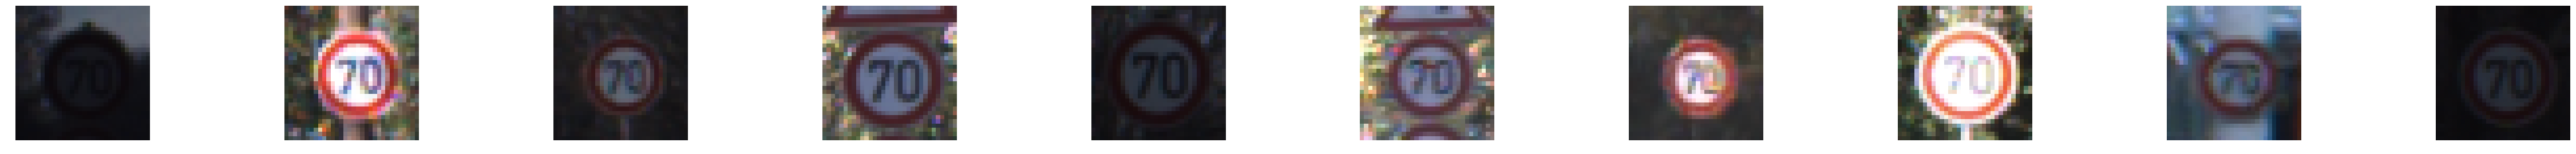

Speed limit (80km/h)


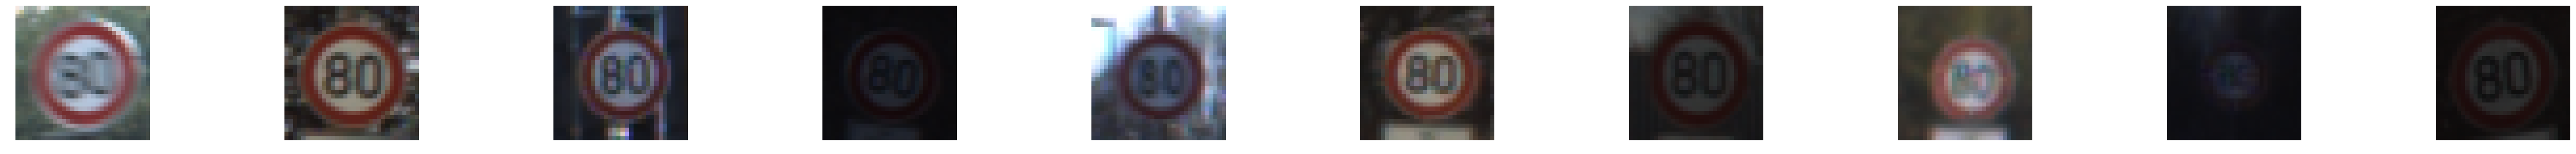

End of speed limit (80km/h)


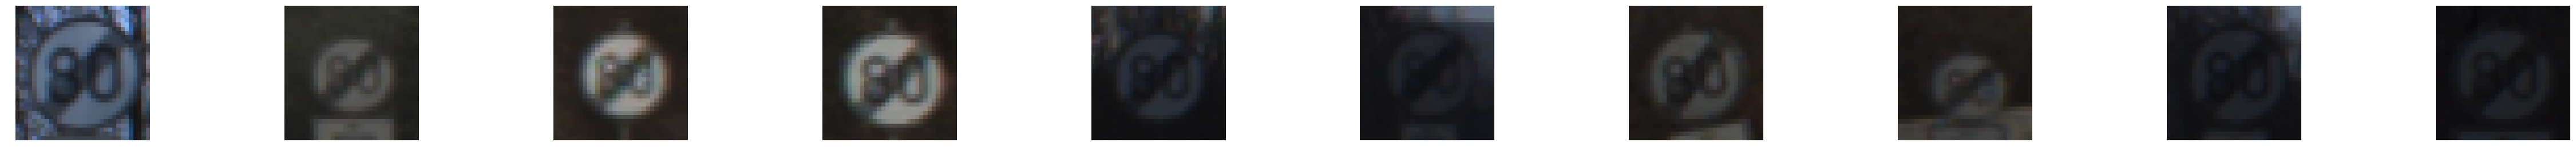

Speed limit (100km/h)


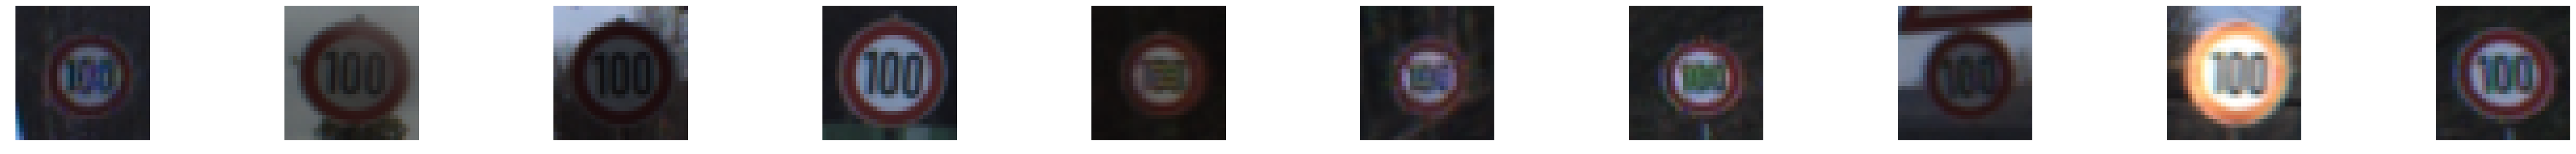

Speed limit (120km/h)


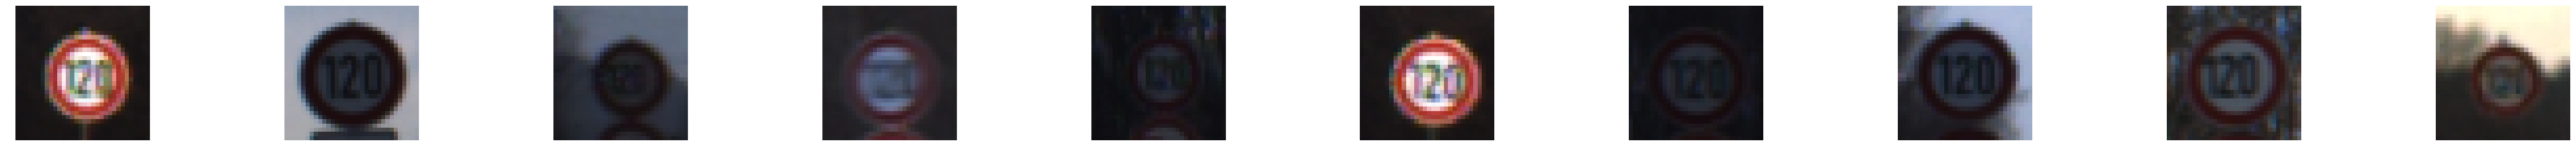

No passing


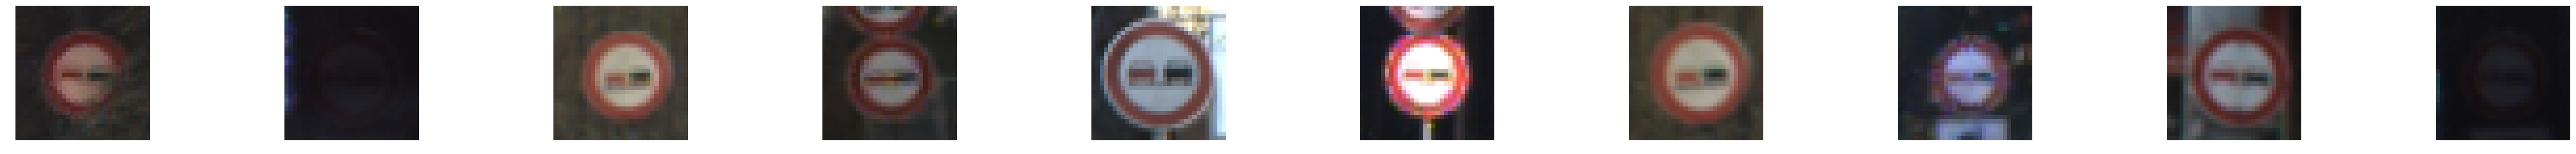

No passing for vehicles over 3.5 metric tons


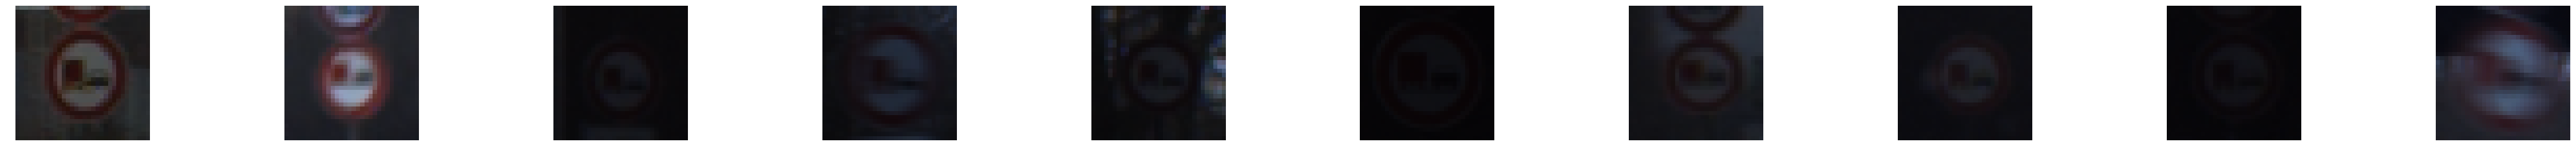

Right-of-way at the next intersection


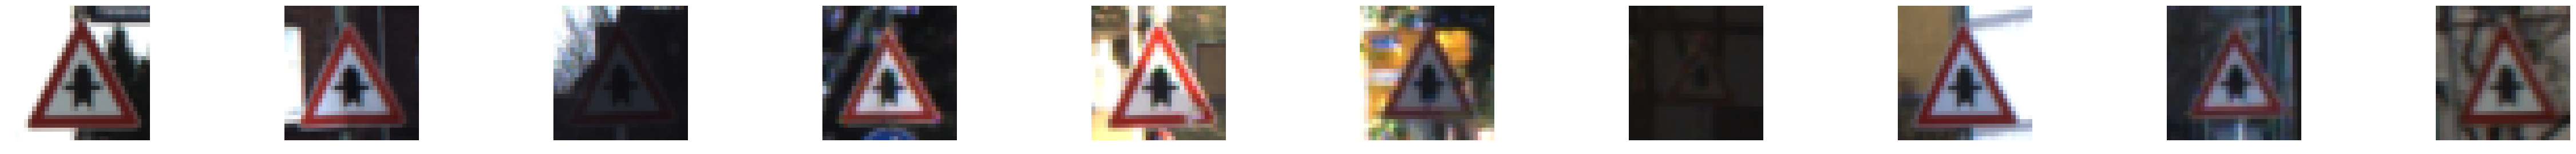

Priority road


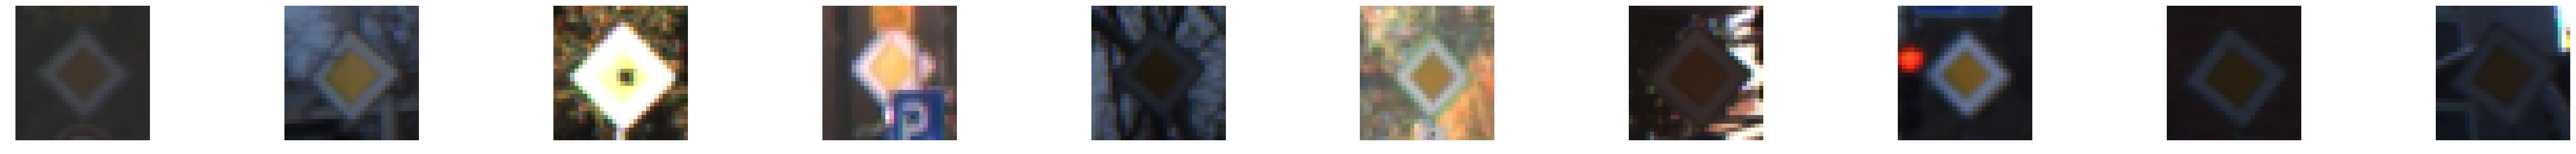

Yield


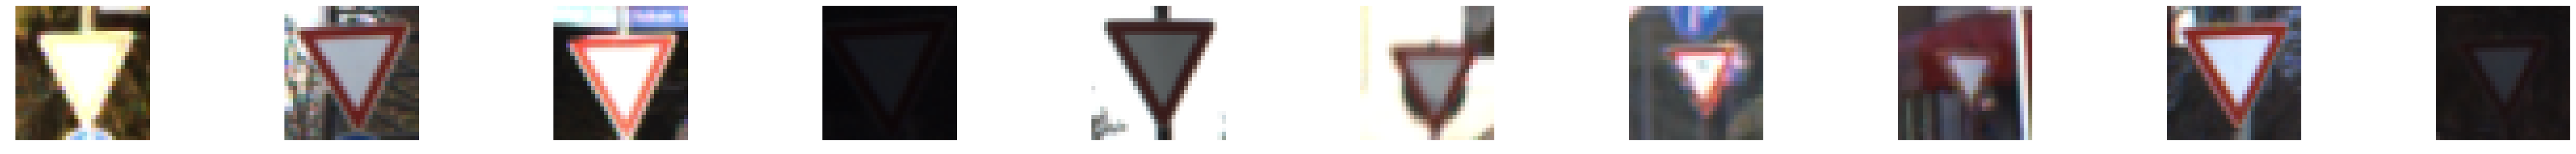

Stop


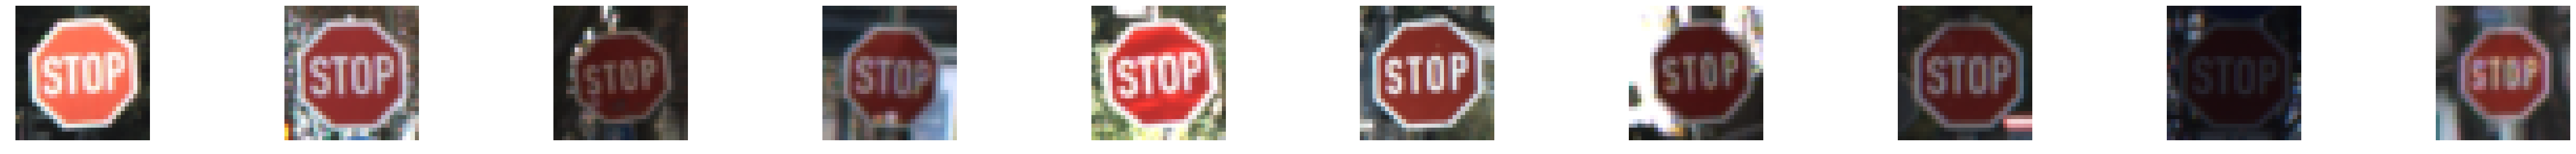

No vehicles


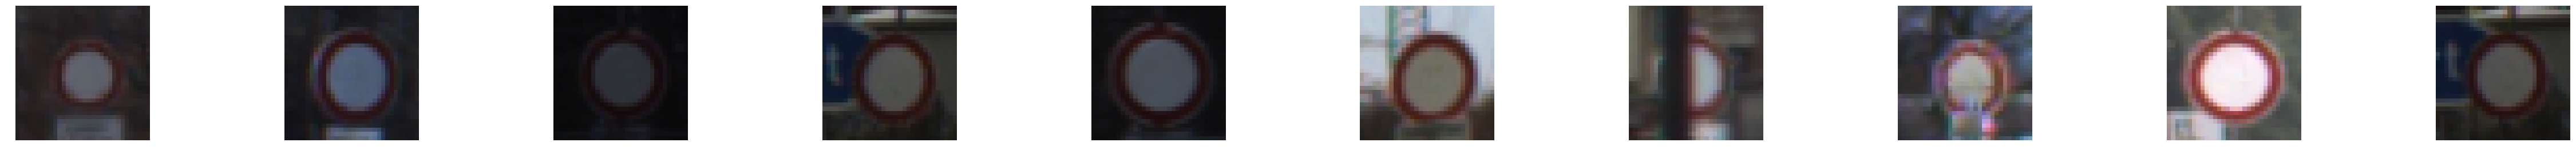

Vehicles over 3.5 metric tons prohibited


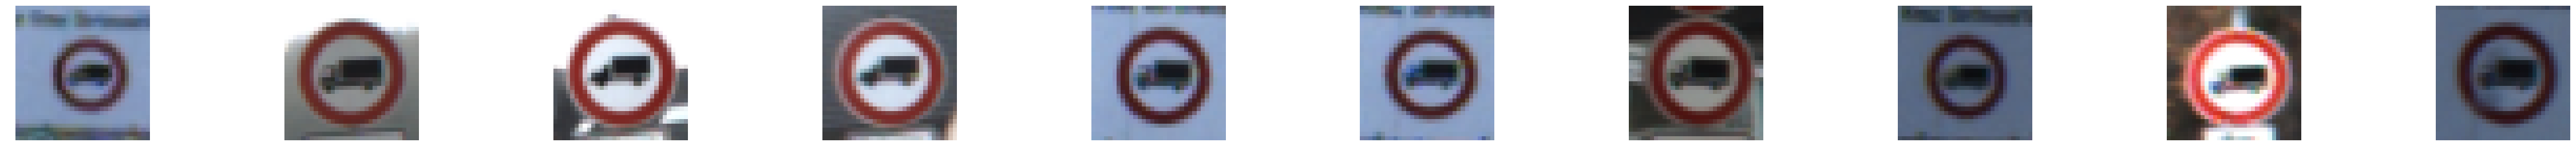

No entry


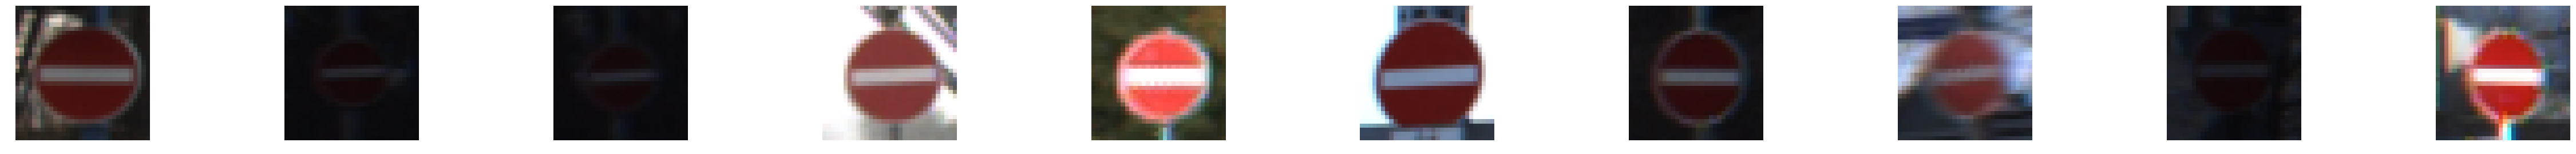

General caution


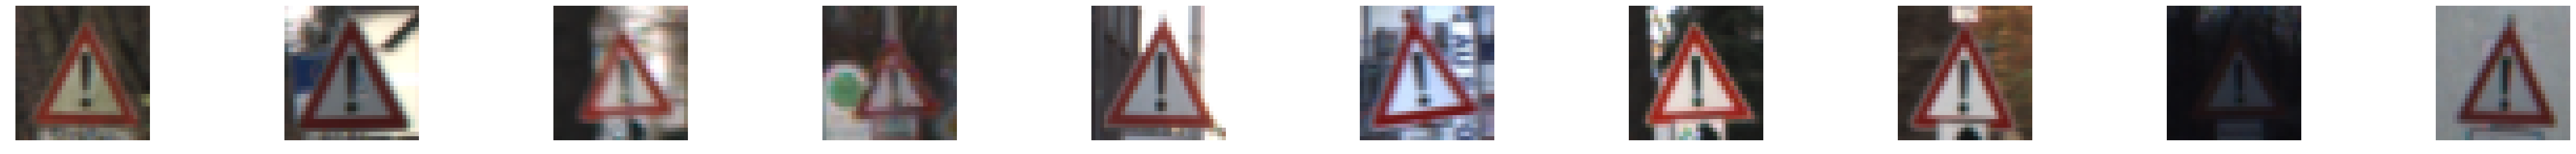

Dangerous curve to the left


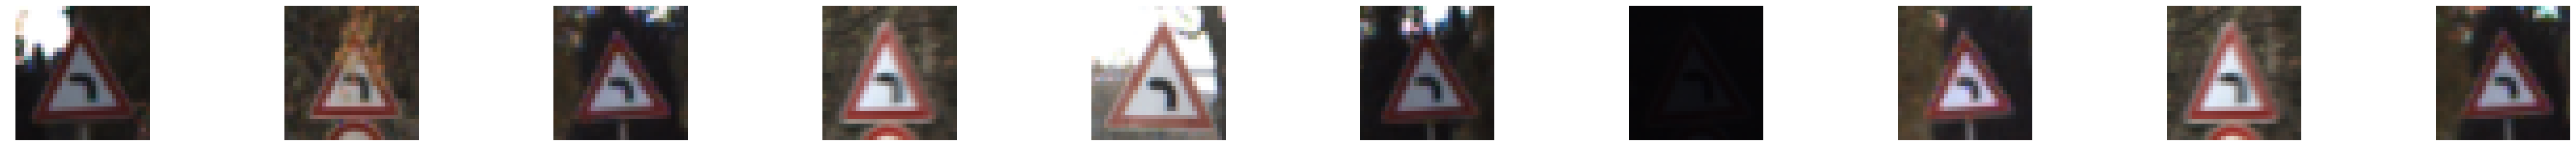

Dangerous curve to the right


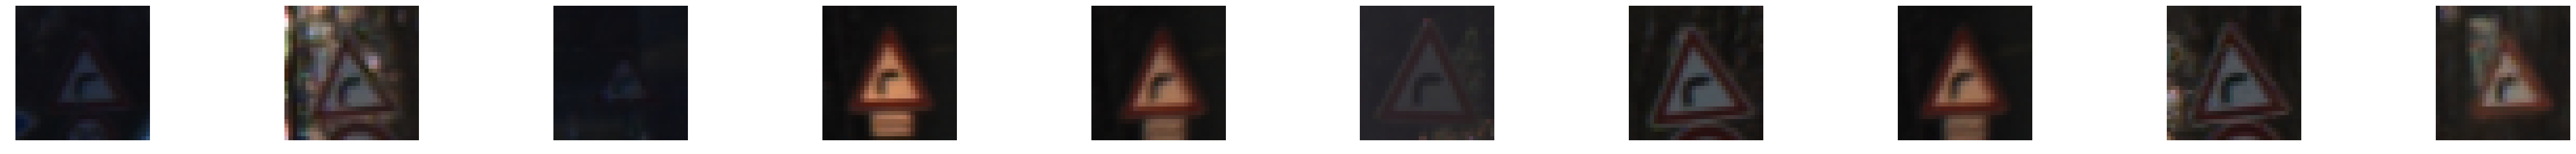

Double curve


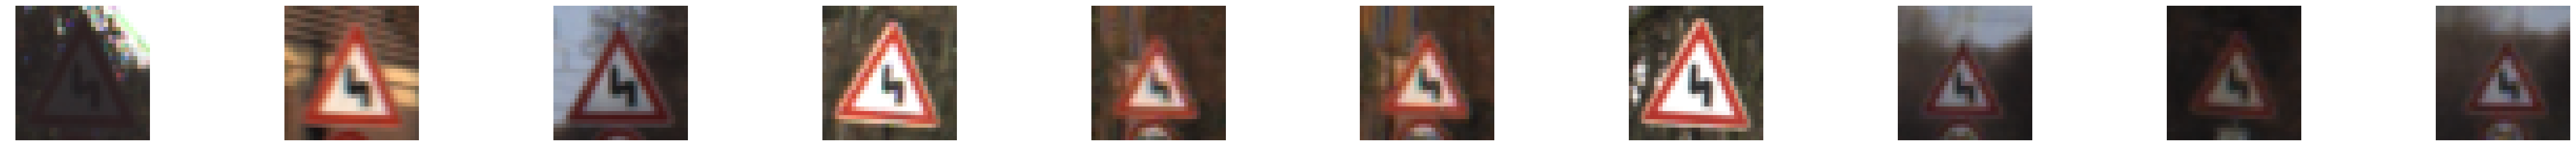

Bumpy road


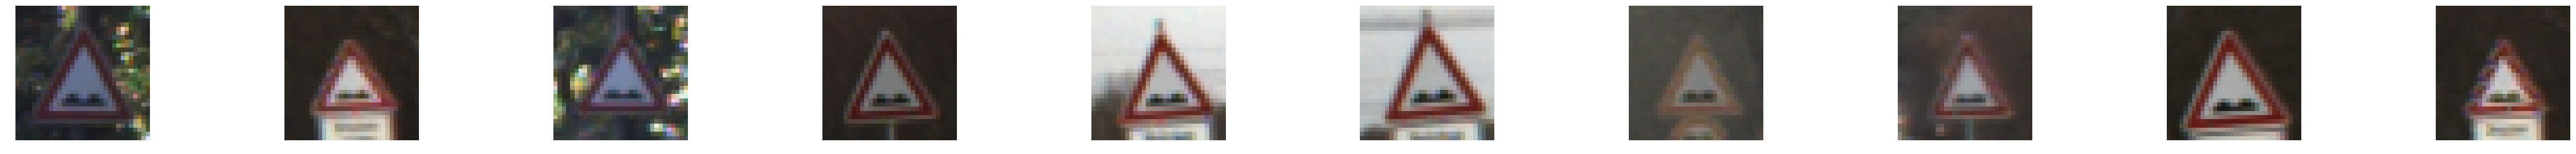

Slippery road


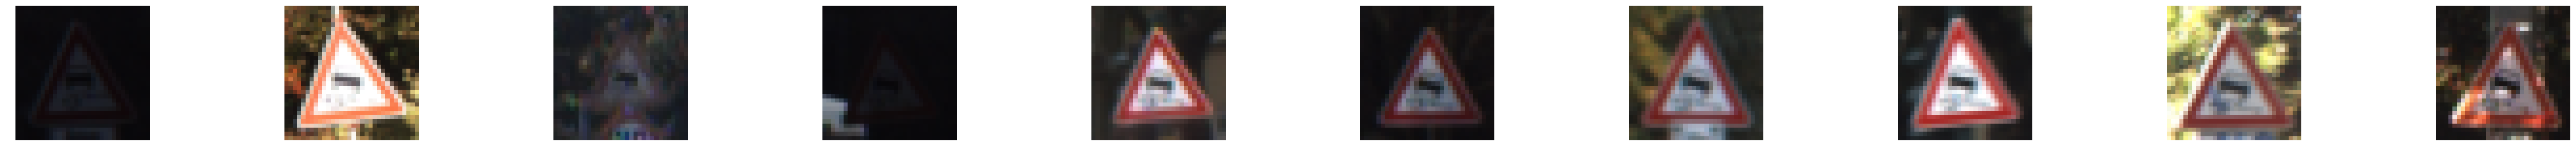

Road narrows on the right


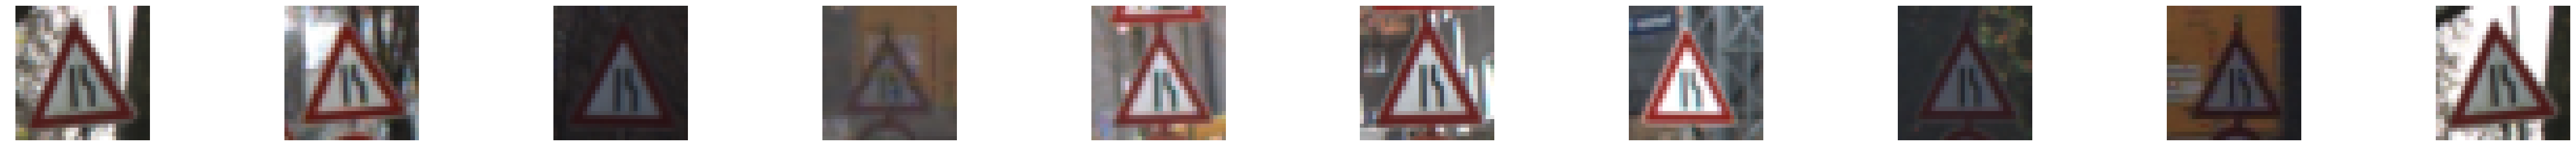

Road work


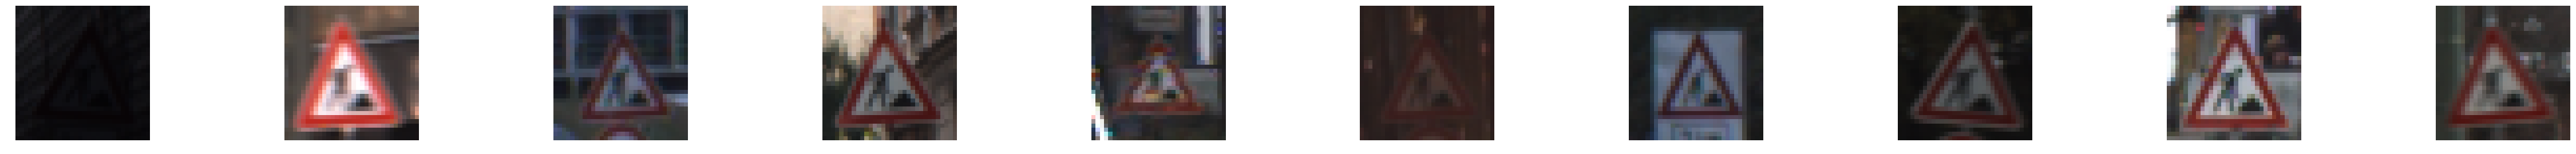

Traffic signals


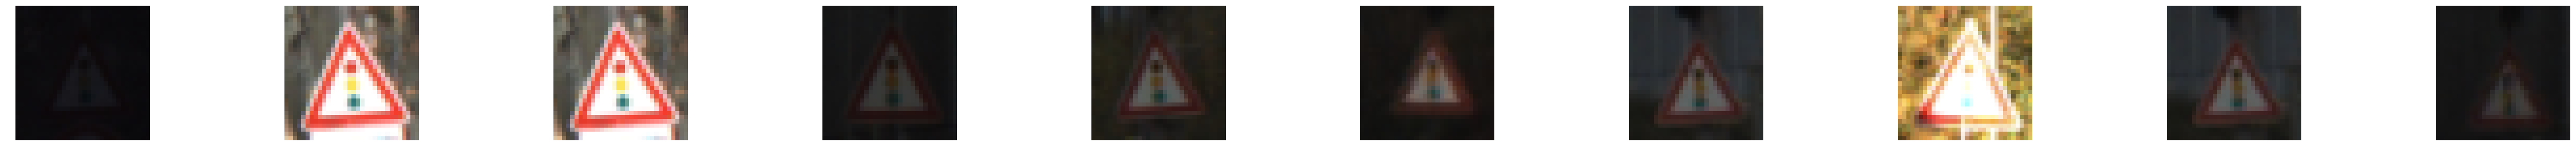

Pedestrians


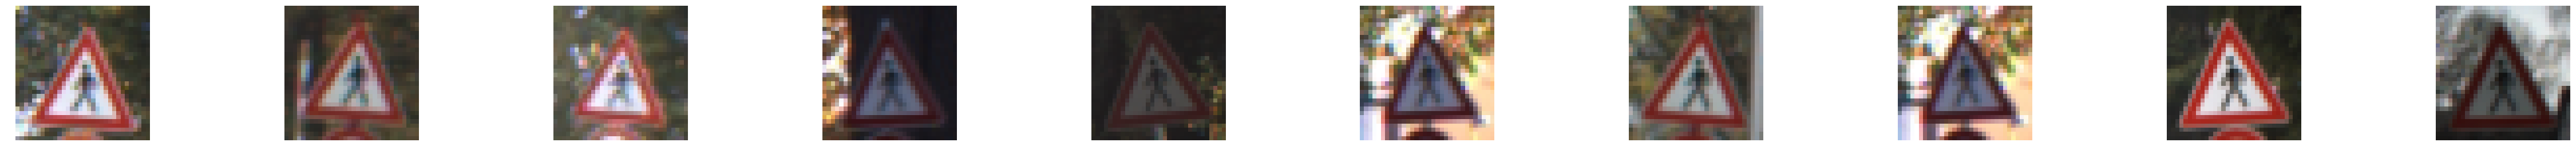

Children crossing


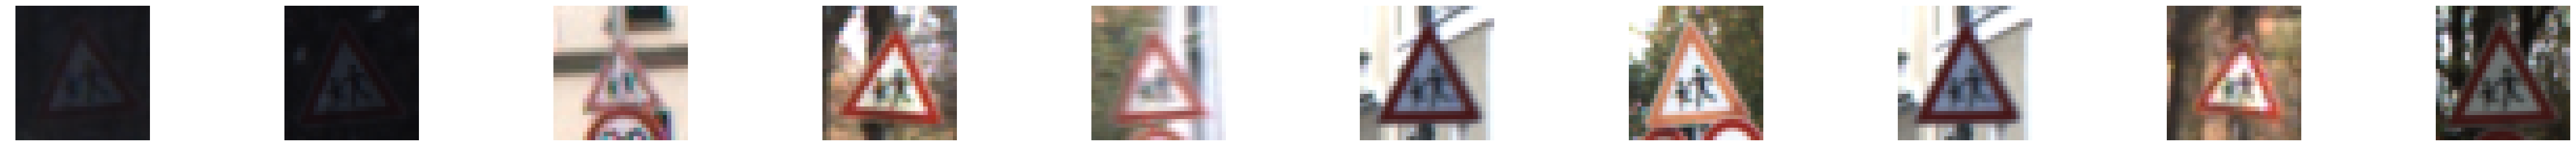

Bicycles crossing


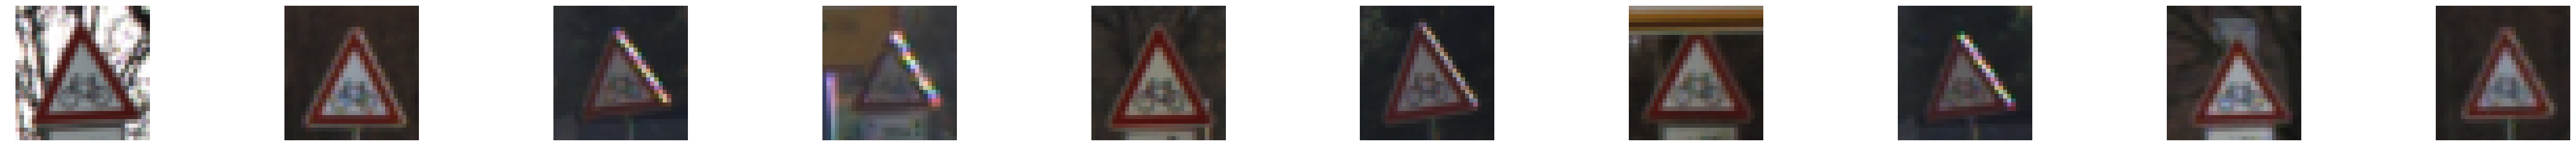

Beware of ice/snow


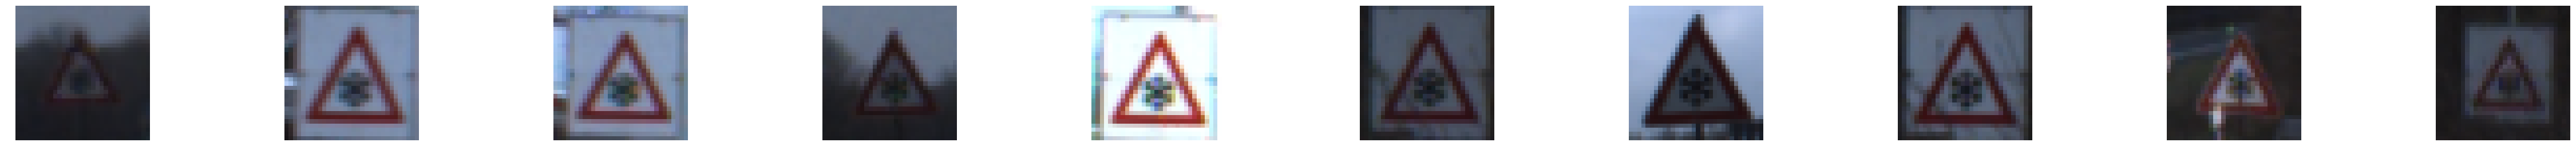

Wild animals crossing


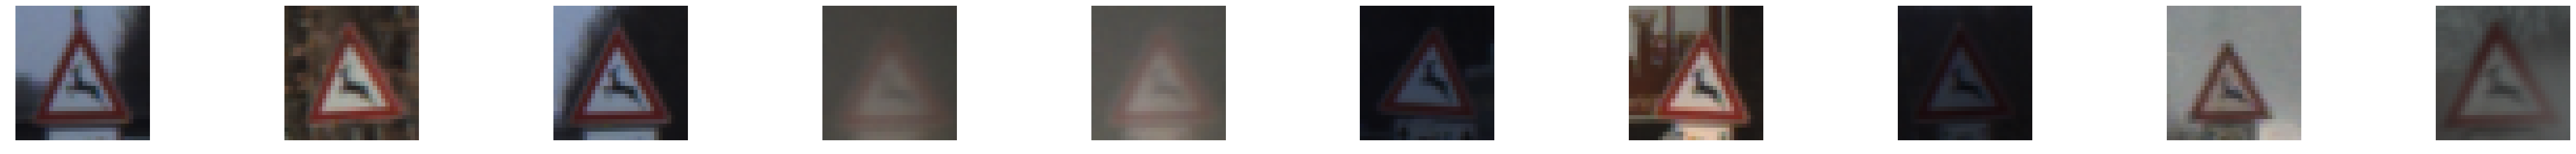

End of all speed and passing limits


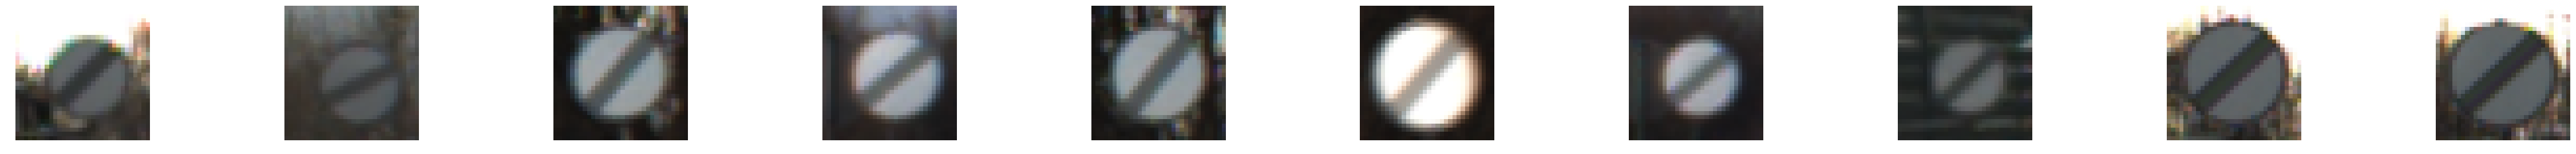

Turn right ahead


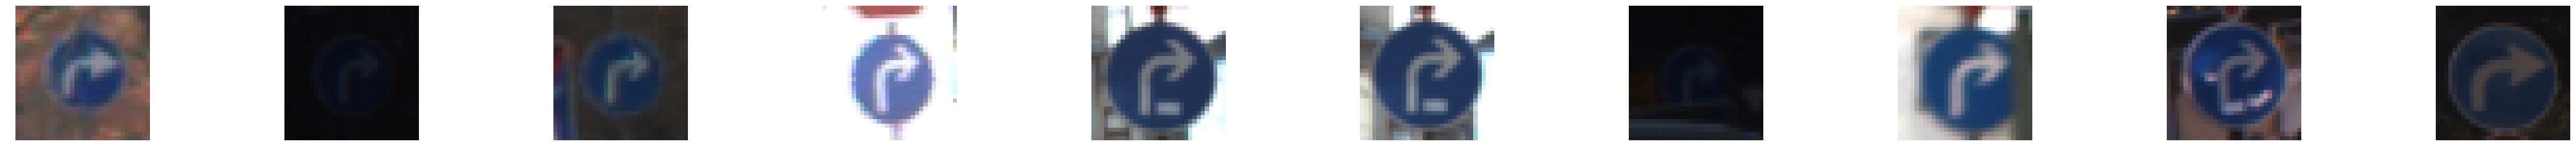

Turn left ahead


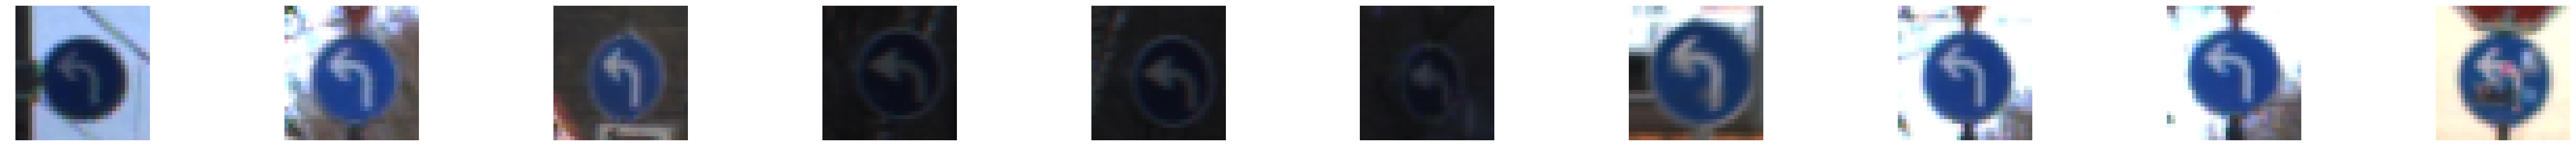

Ahead only


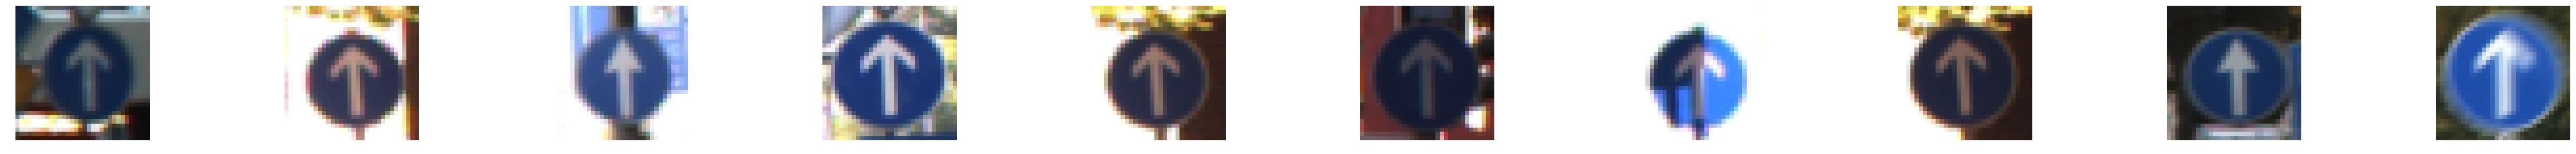

Go straight or right


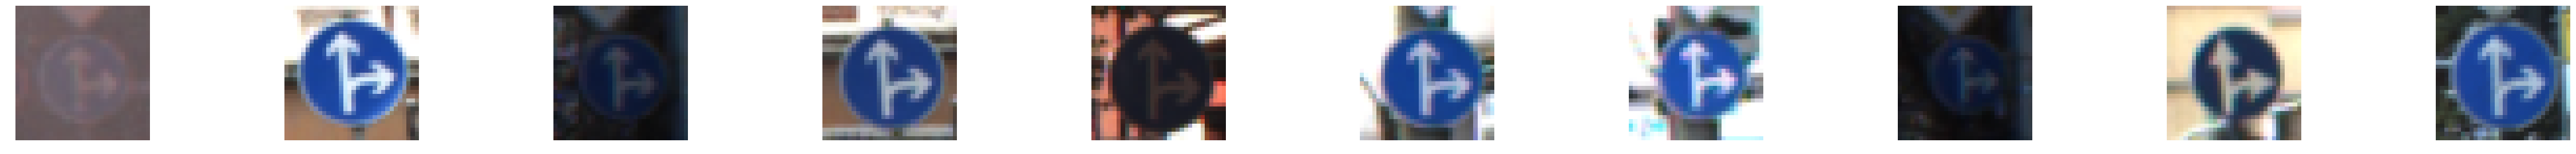

Go straight or left


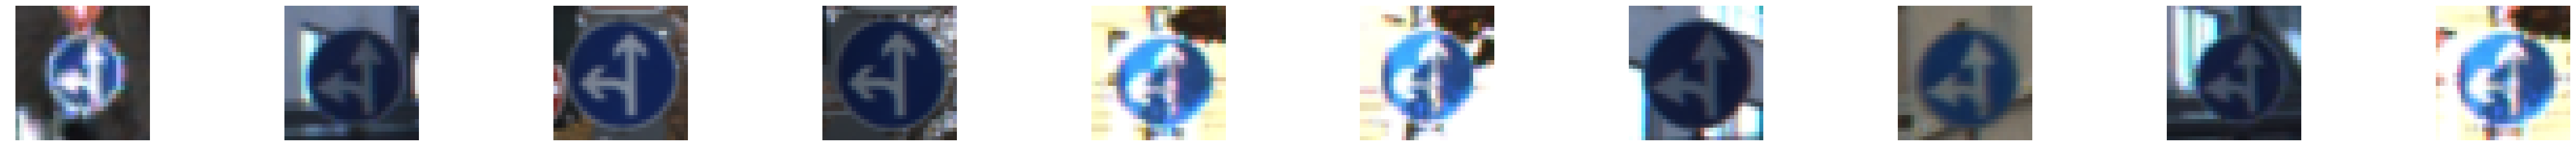

Keep right


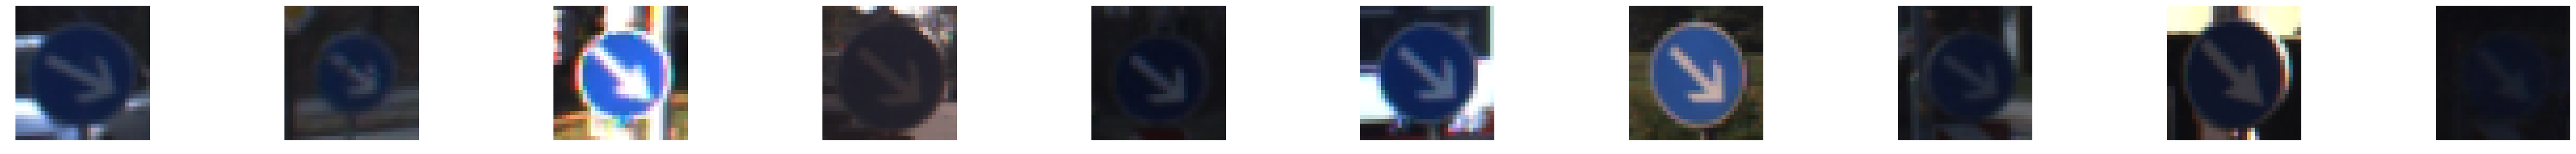

Keep left


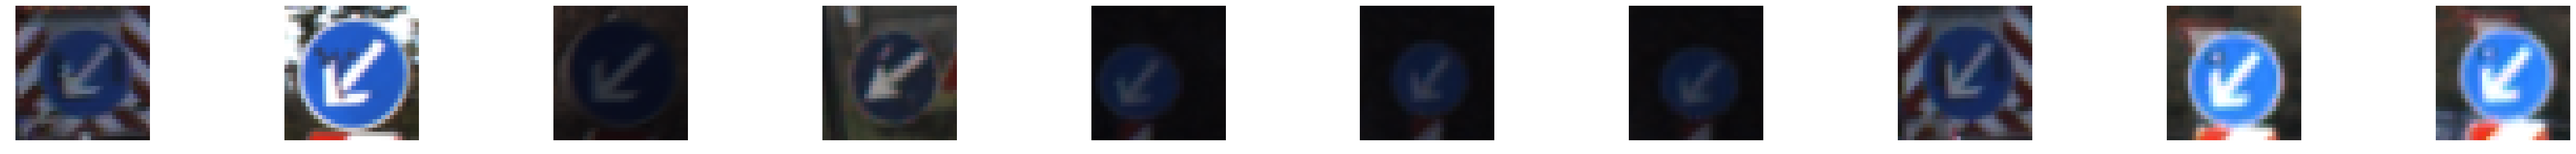

Roundabout mandatory


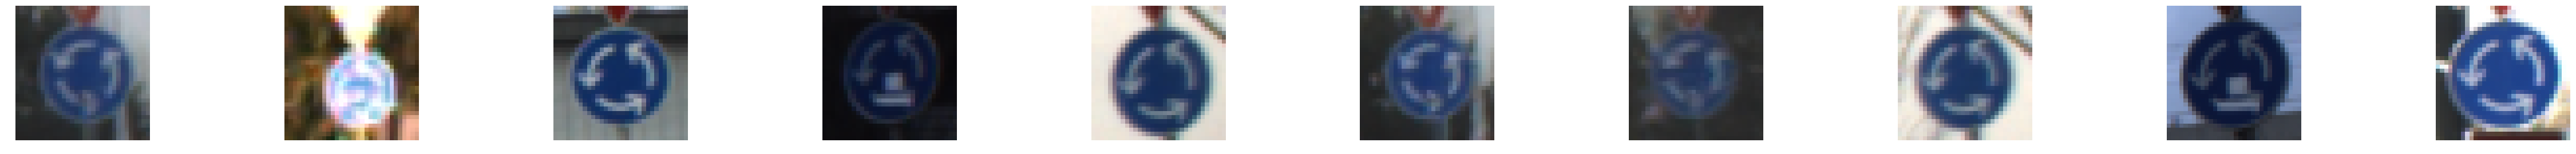

End of no passing


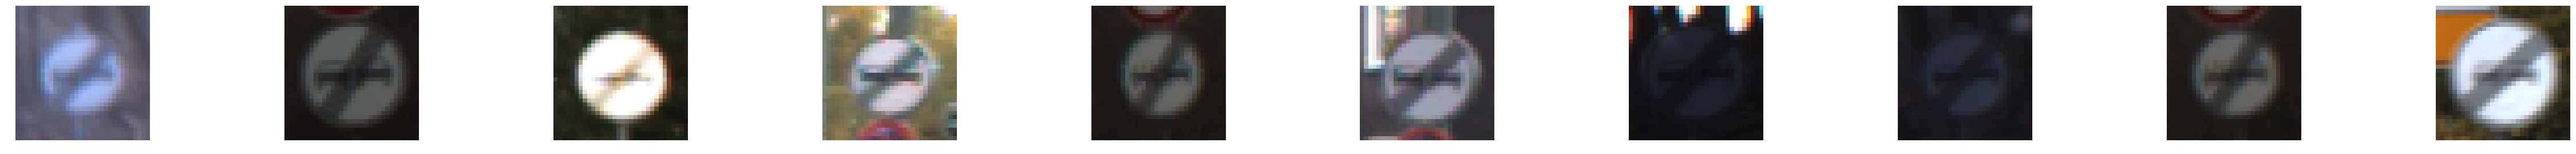

End of no passing by vehicles over 3.5 metric tons


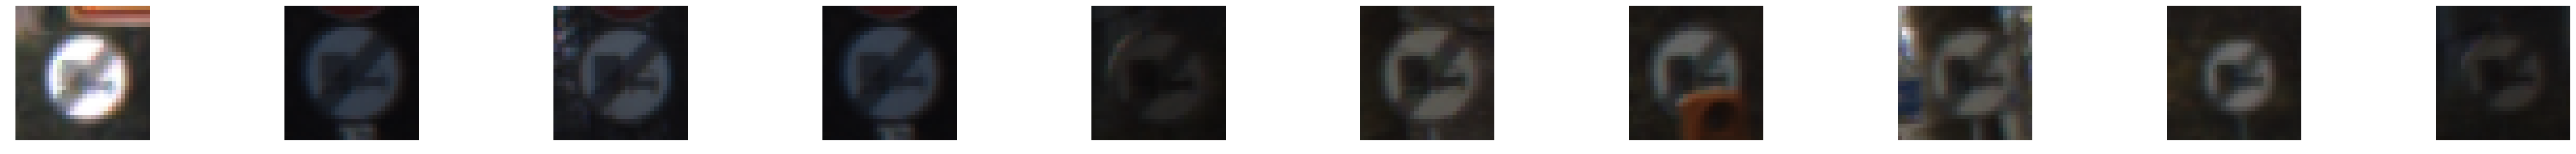

In [4]:
### Data exploration visualization

for c in range(n_classes):
    idx = np.where(y_train == c)  # Find index for class
    index = np.random.choice(idx[0], 10)
    n_image = X_train[index]
    f, axes = plt.subplots(nrows=1, ncols=10, gridspec_kw={'wspace':1, 'hspace':0},
                           squeeze=True, figsize=(80, 30))
    #plt.tight_layout()
    print(df.SignName[c])

    for i , image in enumerate(n_image):
        axes[i].imshow(image)
        axes[i].axis("off")
       
    plt.show()    
    
plt.savefig('Output_graph_image/Data_visualization.jpg', bbox_inches='tight')  

### Plotting the count of each sign





    

In [5]:
def dataframe(type_set):
    if type_set == 'training':
        nbre = y_train.shape[0]
        y = y_train
    elif type_set == 'validation':
        nbre = y_valid.shape[0]
        y = y_valid
    else:
        nbre = y_test.shape[0]
        y = y_test
    sign_names = pd.read_csv("signnames.csv")
    arr = []
    for i in range(nbre):
        id = y[i]
        label = sign_names[sign_names["ClassId"]==y[i]]["SignName"].values[0]
    #print(i, id, label)
        arr.append({"id" : id, "label" : label})
    #return(pd.DataFrame(arr))
    frame = pd.DataFrame(arr)
    frame_graph = frame.groupby('label').count()
    return(frame_graph)  

In [6]:
df_train = dataframe('training')
df_valid = dataframe('validation')
df_test = dataframe('test')

In [7]:
# Plot Sign distribution
def graph():

    plt.style.use('ggplot')
    # set jupyter's max row display
    pd.set_option('display.max_row', 1000)

    # set jupyter's max column width to 50
    pd.set_option('display.max_columns', 50)

   
    # Visualization of Distribution
    ax = df_train["id"].plot(kind="bar",  figsize = (20,15), fontsize=13, color=['dodgerblue'],alpha=0.4, width = 0.95)
    
    ax = df_valid["id"].plot(kind="bar",  figsize = (20,15), fontsize=13, color=['mediumseagreen'], width = 0.95)
    
    ax = df_test["id"].plot(kind="bar",  figsize = (20,15), fontsize=13, color=['coral'],alpha=0.3,width= 0.95)
   
    plt.legend(('Training','Validation','Testing'), loc='upper left',fontsize=15) 

    ax.set_yticks(np.arange(0, 2100, 50))
    ax.set_xlabel('Type sign', fontsize=18)
    ax.set_ylabel('count', fontsize=18)
    ax.set_title("Signs distribution for  Training testing and validation set",fontsize=25)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.04, i.get_height()+ 20, \
            str(round((i.get_height()), 2)), fontsize=11, color='red',
                rotation=45)
    plt.show()

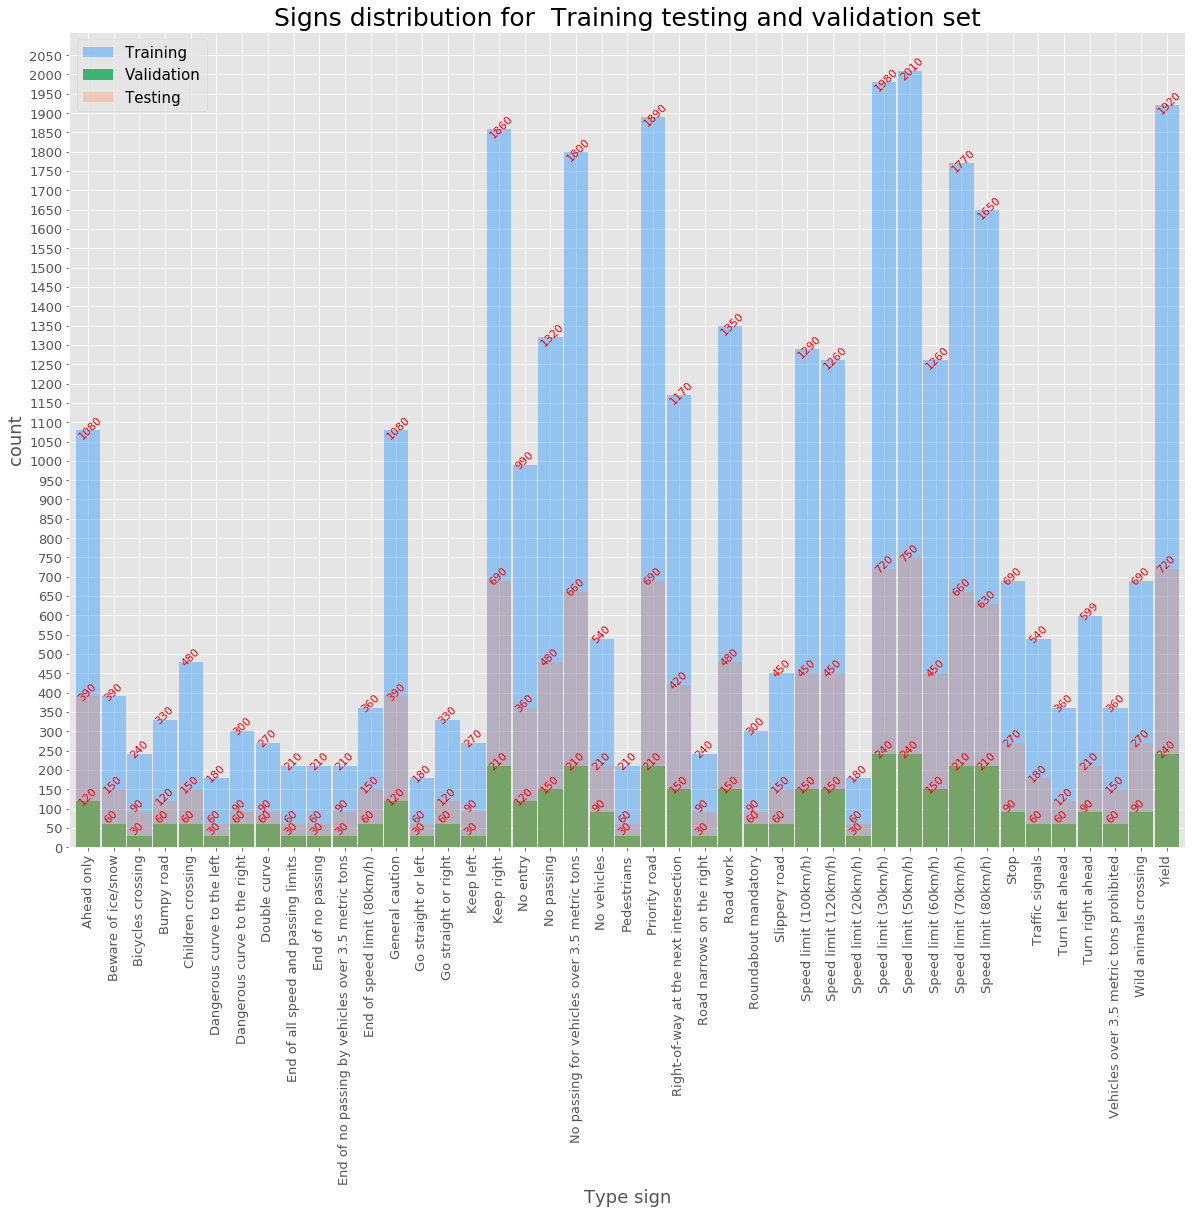

In [8]:
graph()
plt.savefig('Output_graph_image/Sign_distribution.jpg', bbox_inches='tight') 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### Pre-process the Data Set (normalization, grayscale, etc.)

In this step, we will apply several preprocessing steps to the input images to achieve the best possible results.


1) each image is converted from RGB to YUV color space, then only the Y channel is used.

2) contrast of each image is adjusted by means of histogram equalization. This is to mitigate the numerous situation in which the image contrast is really poor.

3) each image is centered on zero mean and divided for its standard deviation. This feature scaling is known to have beneficial effects on the gradient descent performed by the optimizer.

In [9]:
### Preprocess the data.
def preprocess(X):
    
    # convert from RGB to YUV
    yuv = np.array([np.expand_dims(cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)[:, :, 0], 2) for rgb_img in X])
    
    # adjust image contrast
    equalize = np.array([np.expand_dims(cv2.equalizeHist(np.uint8(img)), 2) for img in yuv])
    
    # Min-Max scaling 
    mini, maxi = np.min(equalize), np.max(equalize)
    X = (equalize - mini) / (maxi - mini) * 2 - 1
    
    return X


x_train_n = preprocess(X_train)
x_valid_n = preprocess(X_valid)
x_test_n = preprocess(X_test)


    
    

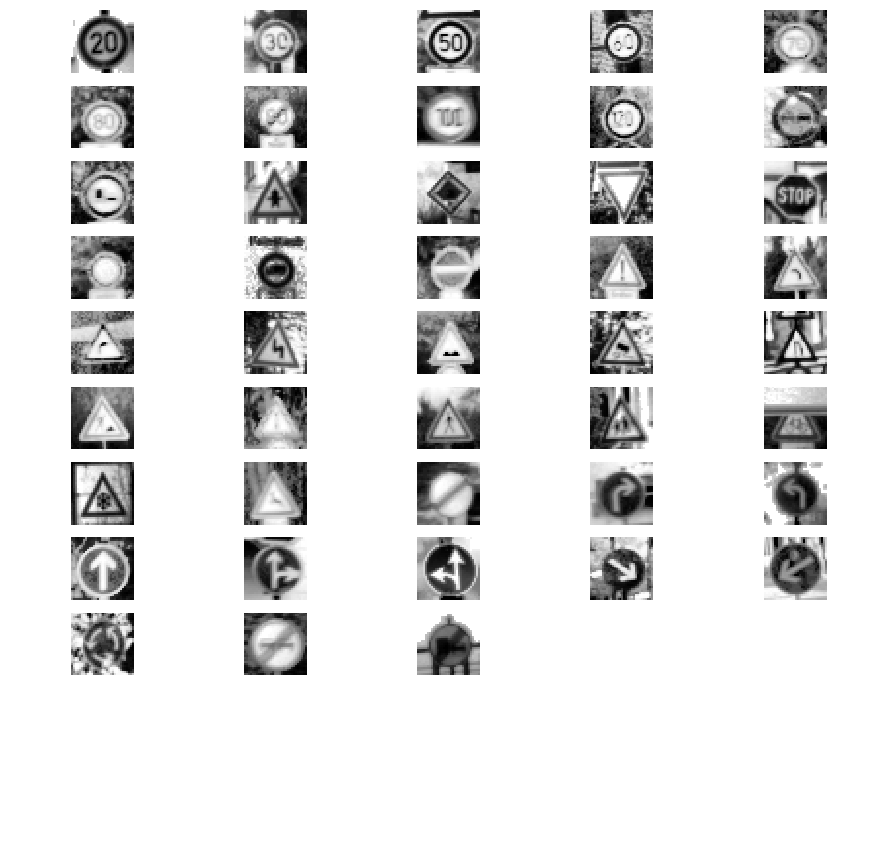

In [10]:
n_classes = np.unique(y_train).size

f, axes = plt.subplots(11, 5,figsize=(15,15))

c = 0
for row in axes:
    for ax in row:
        if c < n_classes:
            im = (x_train_n[np.random.choice(np.where(y_train == c)[0], 1)] + 1) / 2
            ax.imshow(im[0,:,:,0], cmap='gray')
        ax.grid(False)
        ax.axis('off')
        c += 1
plt.savefig('Output_graph_image/Preprocess_Dataset.jpg', bbox_inches='tight')    
plt.show()  
    

### Dataset augmentation


Data augmentation is one of the regularization technique. It consists of generating new training instances from existing ones, artificially boosting the size of the training set.



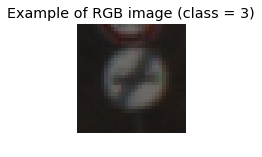

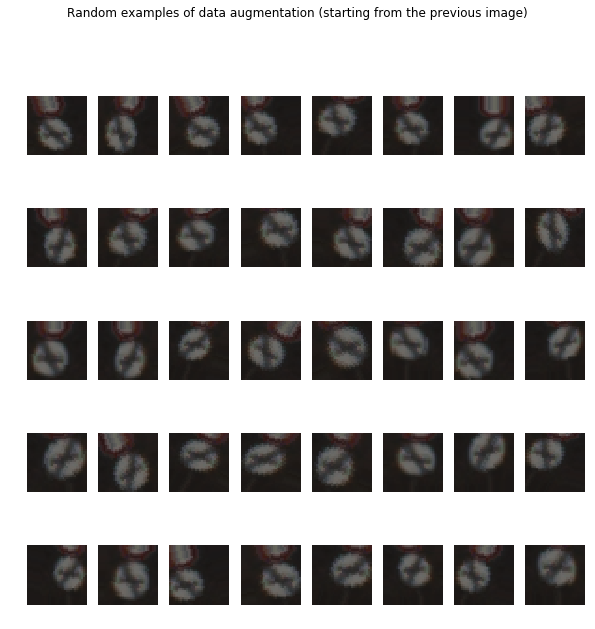

In [11]:
# split into train and validation
VAL_RATIO = 0.2
X_train_norm, X_val_norm, y_train, y_val = train_test_split(x_train_n, y_train, test_size=VAL_RATIO, random_state=0)


# create the generator to perform online data augmentation
image_datagen = ImageDataGenerator(rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest")


# take an image from the training set
img_rgb = X_train[1]

# plot the original image
plt.figure(figsize=(2,2))
plt.grid(False)
plt.axis('off')
plt.imshow(img_rgb)
plt.title('Example of RGB image (class = {})'.format(y_train[0]))
plt.show()


# plot some randomly augmented images
fig, ax_array = plt.subplots(5, 8,figsize=(10,10))
fig.suptitle('Random examples of data augmentation (starting from the previous image)') 
for ax in ax_array.ravel():
    augmented_img, _ = image_datagen.flow(np.expand_dims(img_rgb, 0), y_train[0:1]).next()
    ax.imshow(np.uint8(np.squeeze(augmented_img)))
    ax.grid(False)
    ax.axis('off')
plt.savefig('Output_graph_image/Dataset_augmentation.jpg', bbox_inches='tight')    
plt.show()

To get additional data, I leveraged on the ImageDataGenerator class provided in the Keras library.
Training images are randomly rotated, zoomed , flipped, and shifted but just in a narrow range, in order to create some variety in the data while not completely twisting the original feature content. The result of this process of augmentation is visible in the previous figure.

### Model Architecture

The final architecture is a relatively shallow network made by 4 layers. The first three layers are convolutional, while the fourth and last are fully connected. The output of the three convolutional layers are concatenated and fed to the following dense layer. In this way we provide the fully-connected layer visual patterns at both different levels of abstraction. The last fully-connected layer then maps the prediction into one of the 43 classes.

In [12]:
### Define architecture model.

import tensorflow as tf
from tensorflow.contrib.layers import flatten


# Helper fuction
  
# Conv2D
def conv2d(x, k, input_depth, output_depth, s=1):
    w = tf.Variable(tf.truncated_normal(shape=(k, k, input_depth, output_depth), mean=0, stddev=0.1))
    b = tf.Variable(tf.zeros([output_depth]))
    x = tf.nn.conv2d(x, w, strides=[1, s, s, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


# Max pooling
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
            
            
# Fully connected layer 
def fcn(x, input_size, output_size):
    w = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean=0, stddev=0.1))
    b = tf.Variable(tf.zeros(output_size))
    fc1 = tf.add(tf.matmul(x, w), b)
    return fc1
    

# Model    
def TrafficNet(x):     
    
    #declaring global variables to access them later to visualize the features
    global conv1, conv2, conv3
    
    # Layer 1: Convolutional.
    # Input = 32x32x1. 
    # Filters: 3x3x64.
    # Output = 28x28x64.
    # ReLU Activation.
    
    conv1 = conv2d(x, 3, 1, 64, s=1)
    
    # Max Pooling.
    #Input = 28x28x64.
    #Output = 14x14x64.
    Pool_1 = maxpool2d(conv1, k=2)
    
    # Dropout
    drop_1 = tf.nn.dropout(Pool_1, keep_prob)

    # Layer 2: Convolutional.
    # Input = 14x14x64.
    # Filters: 3x3x128.
    # Output = 12x12x128.
    # ReLU Activation.
    conv2 = conv2d(Pool_1, 3, 64, 128, s=1)
    
    # Max Pooling.
    # Input = 12x12x128.
    # Output = 6x6x128. 
    Pool_2 = maxpool2d(conv2, k=2)
    
    # Dropout
    drop_2 = tf.nn.dropout(Pool_2, keep_prob)
    
    # Layer 3: Convolutional.
    # Input = 6x6x128.
    # Filters: 3x3x64.
    # Output = 4x4x64.
    # ReLU Activation. 
    conv3 = conv2d(Pool_2, 3, 128, 64, s=1)
    
    # Max Pooling.
    # Input = 4x4x64.
    # Output = 2x2x64.
    Pool_3 = maxpool2d(conv3, k=2)
    
    # Dropout
    drop_3 = tf.nn.dropout(Pool_3, keep_prob)

    # Flatten.
    # Input = 14x14x64 and 6x6x128 and 2x2x64.
    # Output = 17408.
    flat_1 = flatten(drop_1)
    flat_2 = flatten(drop_2)
    flat_3 = flatten(drop_3)
    flattened = tf.concat([flat_1,flat_2,flat_3], axis = 1)
    
    # Layer 4: Fully Connected.
    # Input = 17408.
    # Output = 64.
    fc1 = fcn(flattened, flattened.shape[1].value, 64)
    
    # Dropout
    drop_fc1 = tf.nn.dropout(fc1, keep_prob)
    

    # Layer 5: Output.
    # Input = 64.
    # Output = 43.
    logits = fcn(drop_fc1, fc1.shape[1].value, 43)
    
    
    return logits


## Features and Labels
Train TrafficNet to classify sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
rate = 0.001

logits = TrafficNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()



def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Mode

Run the training data through the training pipeline to train the model.



In [15]:
from sklearn.utils import shuffle
EPOCHS = 25
BATCH_SIZE = 128
BATCHES_PER_EPOCH = 5000

train_acc = []
valid_acc = []

# start training
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for epoch in range(EPOCHS):

        print("EPOCH {} ...".format(epoch + 1))

        batch_counter = 0
        for batch_x, batch_y in image_datagen.flow(X_train_norm, y_train, batch_size=BATCH_SIZE):

            batch_counter += 1
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            if batch_counter == BATCHES_PER_EPOCH:
                break

        # at epoch end, evaluate accuracy on both training and validation set
        train_accuracy = evaluate(X_train_norm, y_train)
        val_accuracy = evaluate(X_val_norm, y_val)
        
        train_acc.append(train_accuracy)
        valid_acc.append(val_accuracy)
        
        
        print('Train Accuracy = {:.3f} - Validation Accuracy: {:.3f}%'.format(train_accuracy * 100, val_accuracy * 100))
    saver.save(sess, save_path='model/traffic_sign_model.ckpt')
    print("Model saved")

EPOCH 1 ...
Train Accuracy = 90.700 - Validation Accuracy: 89.828%
EPOCH 2 ...
Train Accuracy = 95.111 - Validation Accuracy: 94.411%
EPOCH 3 ...
Train Accuracy = 97.284 - Validation Accuracy: 97.026%
EPOCH 4 ...
Train Accuracy = 97.622 - Validation Accuracy: 97.428%
EPOCH 5 ...
Train Accuracy = 97.791 - Validation Accuracy: 97.572%
EPOCH 6 ...
Train Accuracy = 98.376 - Validation Accuracy: 97.945%
EPOCH 7 ...
Train Accuracy = 98.315 - Validation Accuracy: 97.917%
EPOCH 8 ...
Train Accuracy = 98.657 - Validation Accuracy: 98.348%
EPOCH 9 ...
Train Accuracy = 98.800 - Validation Accuracy: 98.664%
EPOCH 10 ...
Train Accuracy = 98.998 - Validation Accuracy: 98.592%
EPOCH 11 ...
Train Accuracy = 98.915 - Validation Accuracy: 98.405%
EPOCH 12 ...
Train Accuracy = 99.023 - Validation Accuracy: 98.592%
EPOCH 13 ...
Train Accuracy = 99.080 - Validation Accuracy: 98.549%
EPOCH 14 ...
Train Accuracy = 98.545 - Validation Accuracy: 98.204%
EPOCH 15 ...
Train Accuracy = 99.149 - Validation Accurac

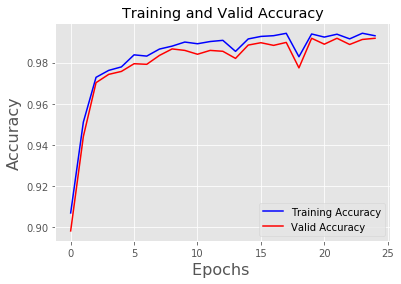

In [16]:
plt.plot( train_acc, 'b', label='Training Accuracy')
plt.plot(valid_acc, 'r', label='Valid Accuracy')
plt.title('Training and Valid Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend()
plt.figure()
plt.savefig('Output_graph_image/Accuracy.jpg', bbox_inches='tight')
plt.show()


# Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

In [17]:
with tf.Session() as sess:
    saver.restore(sess, 'model/traffic_sign_model.ckpt')

    train_accuracy = evaluate(X_train_norm, y_train)
    print("Training Accuracy = {:.3f}%".format(train_accuracy * 100)) 
    
    val_accuracy = evaluate(X_val_norm, y_val)
    print("Validation Accuracy = {:.3f}%".format(val_accuracy * 100)) 
    
    test_accuracy = evaluate(x_test_n, y_test)
    print("Test Accuracy = {:.3f}%".format(test_accuracy * 100))

INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt
Training Accuracy = 99.303%
Validation Accuracy = 99.181%
Test Accuracy = 93.230%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

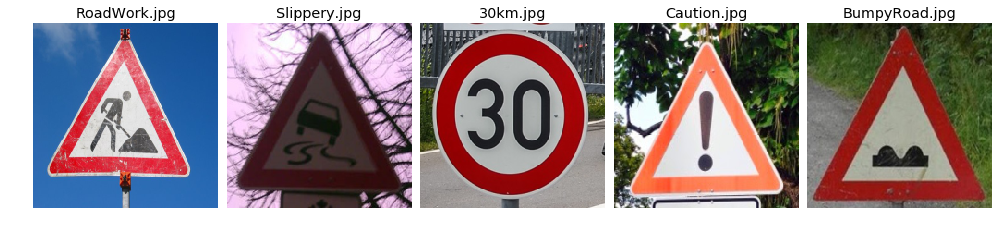

In [18]:
### Load the images and plot them here.
import glob

fig = plt.figure(figsize=(16,4))

fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)



test_images = []

cnt = 0
for img_name in glob.glob('examples/*.jpg'):
    image = mpimg.imread(img_name)
    image_to_show = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    cnt = cnt+1
    sub=plt.subplot(1,6,cnt)
    sub.set_title(img_name[9:])
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image_to_show)
    
    test_images.append(image)
    
test_images = np.array(test_images)    

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt


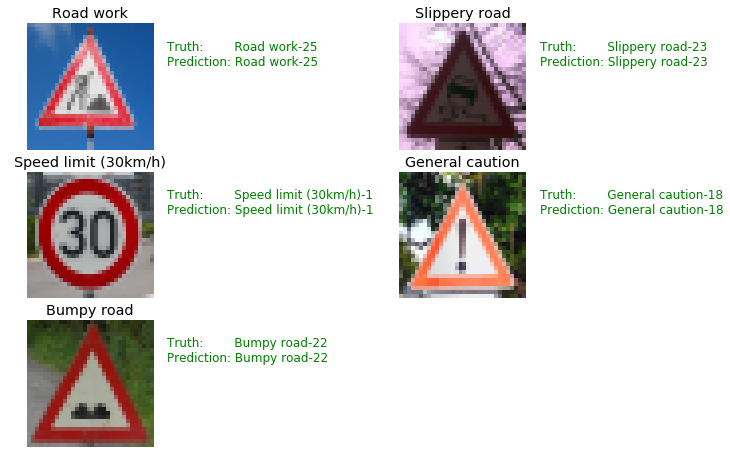

In [19]:
### Run the predictions here and use the model to output the prediction for each image.

# first things first: feature preprocessing
test_processed = preprocess(test_images)


import csv
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    sign_name = list(reader)

label = [25, 23, 1, 18, 22]


with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess,'model/traffic_sign_model.ckpt')
    
    scores = sess.run(logits, feed_dict={x:test_processed, keep_prob:1.0})
    predictions = sess.run(correct_prediction, feed_dict={x: test_processed, y: label, keep_prob: 1.0})

top_scores = np.argmax(scores, 1)    
    
    
    
    
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.17, wspace = 0.07)
 
for i in range(len(label)):

    truth = label[i]
    prediction = predictions[i]
    sub=plt.subplot(5, 2,1+i)
    sub.set_title(sign_name[label[i]][1])
    plt.axis('off')
    color='green' if  prediction == True else 'red'
    plt.text(35, 10, "Truth:        {0}\nPrediction: {1}".format(sign_name[label[i]][1]+ '-' + str(label[i]), str(sign_name[top_scores[i]][1]+ '-' + str(top_scores[i]))), fontsize=12, color=color)
    plt.imshow(test_images[i])
plt.savefig('Output_graph_image/Predict_sign.jpg', bbox_inches='tight')
plt.show()        

### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    saver.restore(sess,'model/traffic_sign_model.ckpt')
    accuracy = sess.run(accuracy_operation, feed_dict={x: test_processed, y: label, keep_prob: 1.0})
    print("Accuracy of internet images recognition = {}%".format(int(100*accuracy)))

INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt
Accuracy of internet images recognition = 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess:
    saver.restore(sess,'model/traffic_sign_model.ckpt')
    y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: test_processed, y: label, keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt


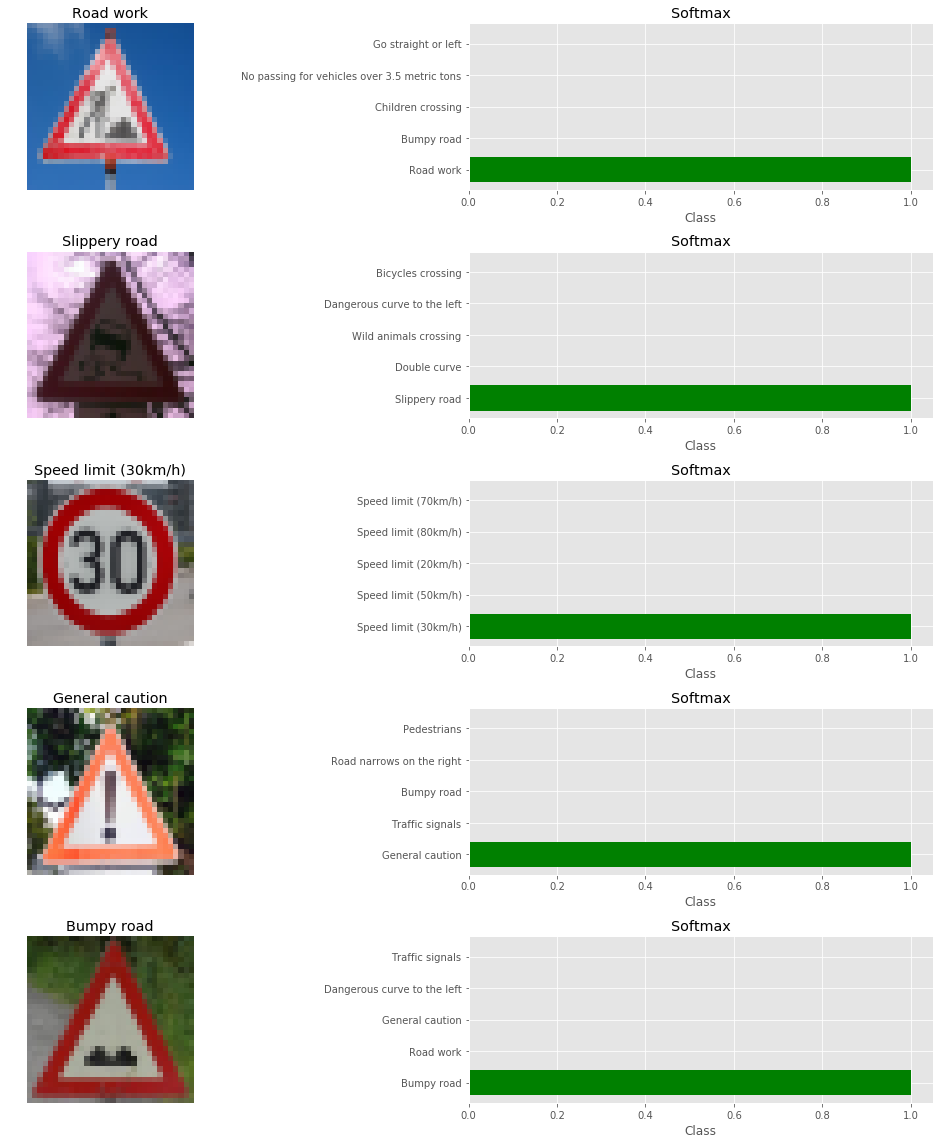

In [22]:
plt.figure(figsize=(15, 16))
new_test_images_len=len(test_processed)
for i in range(new_test_images_len):
    plt.subplot(new_test_images_len, 2, 2*i+1)
    plt.imshow(test_images[i]) 
    plt.title(sign_name[y_pred[i][0]][1])
    plt.axis('off')
    plt.grid(False)
    plt.subplot(new_test_images_len, 2, 2*i+2) 
    plt.xlabel("Class")
    plt.title('Softmax')
    plt.legend(loc='lower right')
    labels = [sign_name[j][1] for j in y_pred[i]]
    plt.barh(np.arange(1, 6, 1), y_prob[i, :], color = 'g')
    plt.yticks(np.arange(1, 6, 1), labels)
plt.tight_layout()    
plt.savefig('Output_graph_image/Softmax Probabilities.jpg', bbox_inches='tight')
plt.show()

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [23]:
### Visualize your network's feature maps here.


# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, figsize=(16,16), row = 8, col = 8 ):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=figsize)
    for featuremap in range(featuremaps):
        plt.subplot(row,col, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### First convolutional layer


INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt


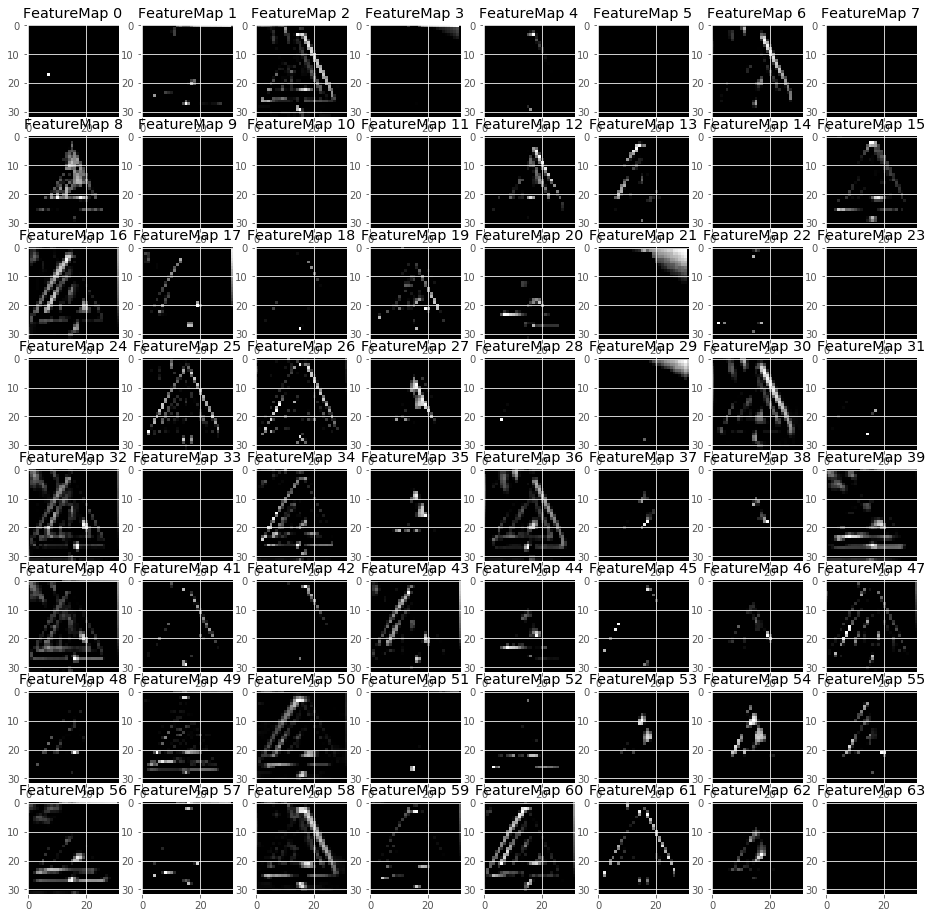

In [24]:
from numpy import array
with tf.Session() as sess:
    saver.restore(sess,'model/traffic_sign_model.ckpt')
    image = array(test_processed[0]).reshape(1, 32,32,1)
    outputFeatureMap(image, conv1)

plt.savefig('output_weights/ConvLayer1.jpg', bbox_inches='tight')
plt.show()    

### Second convolutional layer 

INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt


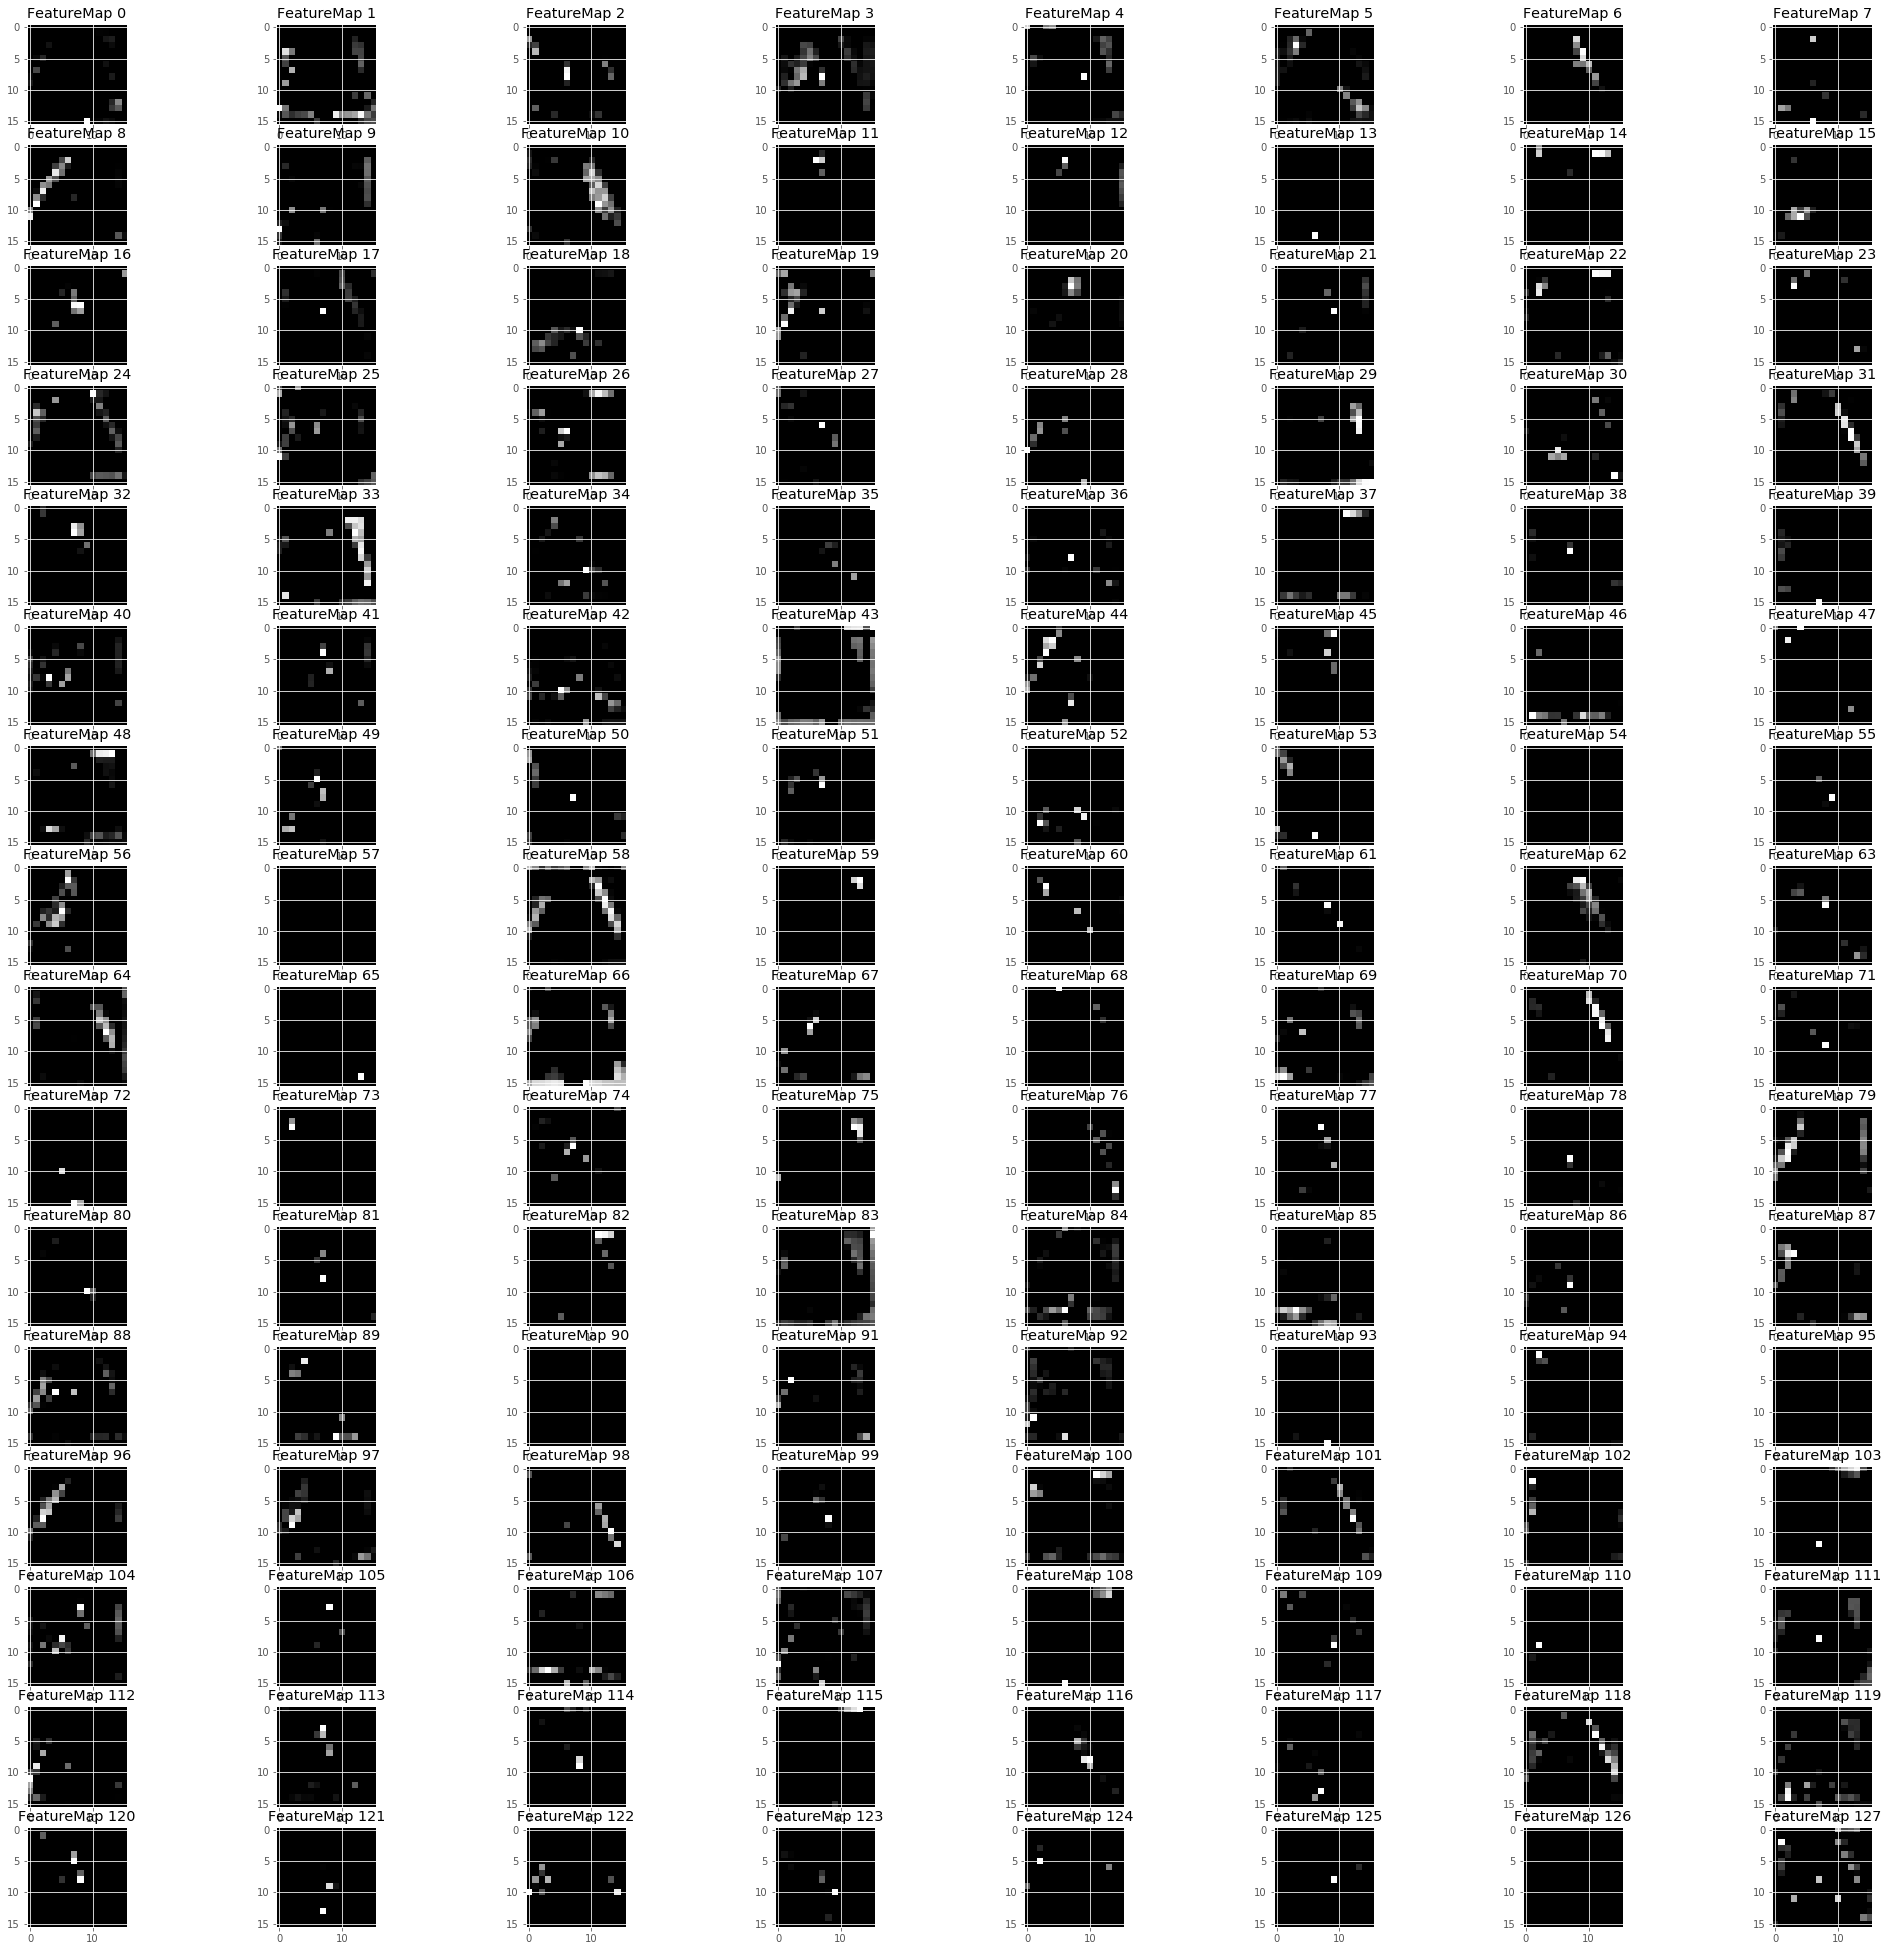

In [25]:
from numpy import array
with tf.Session() as sess:
    saver.restore(sess,'model/traffic_sign_model.ckpt')
    image = array(test_processed[0]).reshape(1, 32,32,1)
    outputFeatureMap(image, conv2, figsize=(35,35), row = 16, col = 8)
  
    
plt.savefig('output_weights/ConvLayer2.jpg', bbox_inches='tight')
plt.show()

### Third convolutional layer

INFO:tensorflow:Restoring parameters from model/traffic_sign_model.ckpt


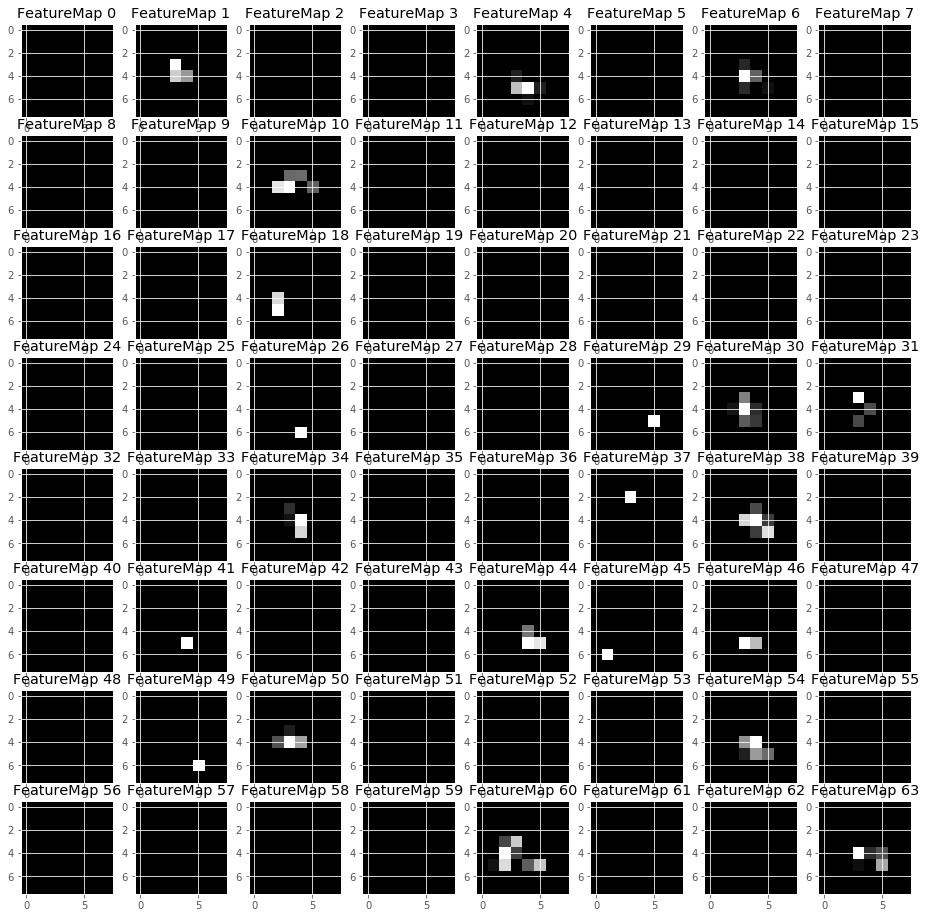

In [26]:
from numpy import array
with tf.Session() as sess:
    saver.restore(sess,'model/traffic_sign_model.ckpt')
    image = array(test_processed[0]).reshape(1, 32,32,1)
    outputFeatureMap(image, conv3)
    
plt.savefig('output_weights/ConvLayer3.jpg', bbox_inches='tight')
plt.show()